# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load the environment variables from the .env file by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [4]:
# The monthly amount for the member's household income
monthly_income = 12000


#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [6]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response, indent=4, sort_keys=True))


{
    "data": {
        "1": {
            "circulating_supply": 19011068,
            "id": 1,
            "last_updated": 1649905743,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 789060746741,
                    "percent_change_1h": -0.213513543081883,
                    "percent_change_24h": 3.03042534233283,
                    "percent_change_7d": -4.14437225938367,
                    "percentage_change_1h": -0.213513543081883,
                    "percentage_change_24h": 3.03042534233283,
                    "percentage_change_7d": -4.14437225938367,
                    "price": 41408.0,
                    "volume_24h": 25087891370
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19011068,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrenc

In [7]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent=4, sort_keys=True))


{
    "data": {
        "1027": {
            "circulating_supply": 120369195,
            "id": 1027,
            "last_updated": 1649905753,
            "max_supply": 0,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 377232188115,
                    "percent_change_1h": -0.611003302569104,
                    "percent_change_24h": 2.31772333144311,
                    "percent_change_7d": -1.44946270839521,
                    "percentage_change_1h": -0.611003302569104,
                    "percentage_change_24h": 2.31772333144311,
                    "percentage_change_7d": -1.44946270839521,
                    "price": 3125.4,
                    "volume_24h": 15339191136
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 120369195,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurre

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [8]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Print the current price of BTC
print(btc_price)


41408.0


In [9]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Print the current price of ETH
print(eth_price)


3125.4


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [10]:
# Compute the current value of the BTC holding 
btc_value = btc_price * btc_coins

# Print current value of your holding in BTC
print(btc_value)


49689.6


In [11]:
# Compute the current value of the ETH holding 
eth_value = eth_price * eth_coins

# Print current value of your holding in ETH
print(eth_value)


16564.62


In [12]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
print(total_crypto_wallet)


66254.22


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [13]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [14]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [15]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ['SPY', 'AGG']

# Set timeframe to 1Day
timeframe = '1Day'

# Format current date as ISO format
# Set both the start and end date at the date of my prior weekday 
start_date = pd.Timestamp('2022-04-12', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-04-12', tz='America/New_York').isoformat()


#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [16]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data with ticker symbol instead of the word 'symbol'
SPY = prices_df[prices_df['symbol']=='SPY'].drop('symbol', axis=1)
AGG = prices_df[prices_df['symbol']=='AGG'].drop('symbol', axis=1)
# Concatenate the ticker DataFrames
prices_df = pd.concat([SPY,AGG], axis=1, keys= ['SPY', 'AGG'])
# For new prices dataframe, keep only the date component
prices_df.index = prices_df.index.date
# Review the first 5 rows of the Alpaca DataFrame
prices_df.head()


SPY                                                  \
              open    high       low   close    volume trade_count   
2022-04-12  443.02  445.75  436.6501  438.29  84020734      694115   

                           AGG                                               \
                  vwap    open    high     low   close   volume trade_count   
2022-04-12  440.815476  104.83  104.92  104.58  104.61  8448652       29955   

                        
                  vwap  
2022-04-12  104.740856

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [17]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = float(prices_df['AGG']['close'])

# Print the AGG closing price
print(agg_close_price)


104.61


In [18]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = float(prices_df['SPY']['close'])

# Print the SPY closing price
print(spy_close_price)


438.29


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [19]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_shares * agg_close_price

# Print the current value of the bond portfolio
print(agg_value)


20922.0


In [20]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_shares * spy_close_price

# Print the current value of the stock portfolio
print(spy_value)


48211.9


In [21]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
print(total_stocks_bonds)


69133.9


In [22]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency wallet to the value of the total stocks and bonds
total_portfolio = total_crypto_wallet + total_stocks_bonds

# Print current cryptocurrency wallet balance
print(total_portfolio)


135388.12


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [23]:
# Creating a list of saving data that includes both total crypto amount and total stocks and bonds amount
savings_data = [total_crypto_wallet, total_stocks_bonds]

# Review the savings_data list
savings_data
    

[66254.22, 69133.9]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [24]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(savings_data, columns=['amount'], index = ['crypto', 'stock/bond'])

# Display the savings_df DataFrame
display(savings_df)


,amount
crypto,66254.22
stock/bond,69133.90


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'Portfolio Composition of 2022-04-12'}, ylabel='amount'>

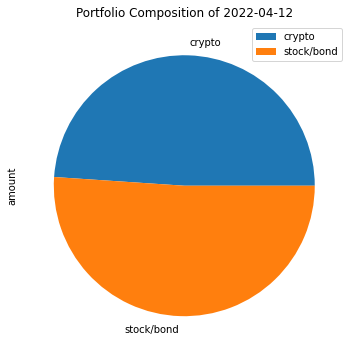

In [25]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot.pie(figsize=(7,6), y='amount', title='Portfolio Composition of 2022-04-12')


#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [26]:
# Create a variable named emergency_fund_value
emergency_fund_value= monthly_income * 3


##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [27]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio > emergency_fund_value:
    print('Congratulations, your total portfolio is large enough to fund the emergency fund.')
elif total_portfolio == emergency_fund_value:
    print('Congratulations, you have reached your goal of having an emergency fund.')
else:
    print(f'You are currently ${(emergency_fund_value - total_portfolio)} away from reaching the goal.')


Congratulations, your total portfolio is large enough to fund the emergency fund.


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [28]:
# Set start and end dates of 3 years back from my current date using ISO standard
new_start_date = pd.Timestamp('2019-04-12', tz='America/New_York').isoformat()
new_end_date = pd.Timestamp('2022-04-12', tz='America/New_York').isoformat()


In [29]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ['SPY', 'AGG']
# Set timeframe to 1Day
timeframe = '1Day'

# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
prices_3years_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=new_start_date,
    end=new_end_date,
).df

# Reorganize the DataFrame
# Separate ticker data into their respective tickers
SPY = prices_3years_df[prices_3years_df['symbol']=='SPY'].drop('symbol', axis=1)
AGG = prices_3years_df[prices_3years_df['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
prices_3years_df = pd.concat([SPY,AGG], axis=1, keys= ['SPY', 'AGG'])

# Display both the first and last five rows of the DataFrame
display(prices_3years_df.head())
display(prices_3years_df.tail())


SPY                                      \
                             open     high      low   close    volume   
timestamp                                                               
2019-04-12 04:00:00+00:00  290.01  290.470  288.261  290.16  69835782   
2019-04-15 04:00:00+00:00  290.27  290.350  289.075  289.97  50222730   
2019-04-16 04:00:00+00:00  290.96  291.010  289.500  290.16  52154597   
2019-04-17 04:00:00+00:00  291.41  291.425  288.990  289.45  58268470   
2019-04-18 04:00:00+00:00  290.12  290.320  288.660  290.02  69414428   

                                                      AGG                    \
                          trade_count        vwap    open      high     low   
timestamp                                                                     
2019-04-12 04:00:00+00:00      232166  289.776012  108.26  108.3500  108.22   
2019-04-15 04:00:00+00:00      199622  289.773677  108.21  108.3000  108.21   
2019-04-16 04:00:00+00:00      206469  290.277078  108.12  108.2100  108.02   
2019-04-17 04:00:00+00:00      245037  289.770682  108.09  108.1899  108.05   
2019-04-18 04:00:00+00:00      231296  289.794161  108.23  108.2900  108.16   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2019-04-12 04:00:00+00:00  108.27  2430609       11376  108.269606  
2019-04-15 04:00:00+00:00  108.25  2546204       10053  108.253507  
2019-04-16 04:00:00+00:00  108.06  4093950       12649  108.108731  
2019-04-17 04:00:00+00:00  108.05  3390171        9569  108.090758  
2019-04-18 04:00:00+00:00  108.19  2217221        8388  108.211849

SPY                                       \
                             open    high       low   close     volume   
timestamp                                                                
2022-04-06 04:00:00+00:00  446.87  448.93  443.4700  446.52  105592595   
2022-04-07 04:00:00+00:00  445.67  450.69  443.5300  448.77   77538519   
2022-04-08 04:00:00+00:00  448.04  450.63  445.9400  447.57   79148376   
2022-04-11 04:00:00+00:00  444.11  445.00  439.3900  439.92   89825549   
2022-04-12 04:00:00+00:00  443.02  445.75  436.6501  438.29   84020734   

                                                      AGG                    \
                          trade_count        vwap    open     high      low   
timestamp                                                                     
2022-04-06 04:00:00+00:00      901634  446.345270  105.20  105.805  105.115   
2022-04-07 04:00:00+00:00      628673  447.098209  105.38  105.510  105.130   
2022-04-08 04:00:00+00:00      573491  448.250805  104.82  105.010  104.615   
2022-04-11 04:00:00+00:00      779421  442.206374  104.44  104.505  104.170   
2022-04-12 04:00:00+00:00      694115  440.815476  104.83  104.920  104.580   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2022-04-06 04:00:00+00:00  105.49  13322630       47090  105.463015  
2022-04-07 04:00:00+00:00  105.26   7921117       25631  105.278761  
2022-04-08 04:00:00+00:00  104.73   6501822       24900  104.804999  
2022-04-11 04:00:00+00:00  104.28   8377902       29767  104.312835  
2022-04-12 04:00:00+00:00  104.61   8448652       29955  104.740856

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [30]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 60% to SPY and 40% to AGG.
# Run 500 samples.
MC_spy_agg = MCSimulation(
    portfolio_data = prices_3years_df,
    weights = [.6,.4],
    num_simulation = 500,
    num_trading_days = 252*30
)
# Review the simulation input data
MC_spy_agg.portfolio_data.head()


SPY                                      \
                             open     high      low   close    volume   
timestamp                                                               
2019-04-12 04:00:00+00:00  290.01  290.470  288.261  290.16  69835782   
2019-04-15 04:00:00+00:00  290.27  290.350  289.075  289.97  50222730   
2019-04-16 04:00:00+00:00  290.96  291.010  289.500  290.16  52154597   
2019-04-17 04:00:00+00:00  291.41  291.425  288.990  289.45  58268470   
2019-04-18 04:00:00+00:00  290.12  290.320  288.660  290.02  69414428   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-04-12 04:00:00+00:00      232166  289.776012          NaN  108.26   
2019-04-15 04:00:00+00:00      199622  289.773677    -0.000655  108.21   
2019-04-16 04:00:00+00:00      206469  290.277078     0.000655  108.12   
2019-04-17 04:00:00+00:00      245037  289.770682    -0.002447  108.09   
2019-04-18 04:00:00+00:00      231296  289.794161     0.001969  108.23   

                                                                          \
                               high     low   close   volume trade_count   
timestamp                                                                  
2019-04-12 04:00:00+00:00  108.3500  108.22  108.27  2430609       11376   
2019-04-15 04:00:00+00:00  108.3000  108.21  108.25  2546204       10053   
2019-04-16 04:00:00+00:00  108.2100  108.02  108.06  4093950       12649   
2019-04-17 04:00:00+00:00  108.1899  108.05  108.05  3390171        9569   
2019-04-18 04:00:00+00:00  108.2900  108.16  108.19  2217221        8388   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-04-12 04:00:00+00:00  108.269606          NaN  
2019-04-15 04:00:00+00:00  108.253507    -0.000185  
2019-04-16 04:00:00+00:00  108.108731    -0.001755  
2019-04-17 04:00:00+00:00  108.090758    -0.000093  
2019-04-18 04:00:00+00:00  108.211849     0.001296

In [31]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
MC_spy_agg.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/yjun_ln/Desktop/financial_planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001422,0.994262,1.009153,0.992489,1.014071,0.992304,1.004027,0.989985,0.992363,1.001153,...,1.005890,1.007976,1.009638,0.992782,0.995791,0.973541,0.991353,1.002027,0.988289,1.001936
2,1.004772,0.992597,1.007914,0.990689,1.007236,0.992137,0.993973,1.009452,0.996350,0.997217,...,0.999046,1.020284,1.014704,0.997124,0.993253,0.975917,0.978969,0.998377,0.986204,0.999673
3,0.995353,1.009868,1.008164,0.995643,1.011134,0.992671,0.996483,1.009670,0.989256,0.996900,...,0.995097,1.012930,1.015638,1.009468,1.000305,0.962665,0.974302,0.995797,1.002397,1.004924
4,1.004510,1.016755,0.993992,0.994528,1.005429,1.006623,1.007940,1.016098,0.983136,1.016638,...,0.996509,1.005199,1.023737,1.013635,0.986030,0.955979,0.974451,0.995171,0.998059,1.004567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3.700624,14.981865,18.781025,10.608744,4.013269,103.189714,18.280621,7.834520,6.296957,20.424680,...,2.371420,7.816572,5.062080,3.931012,14.016093,9.495728,4.244119,7.669709,23.885369,3.771089
7557,3.723200,14.916214,18.723035,10.630247,4.057081,102.977809,18.102192,7.784826,6.291819,20.257972,...,2.418229,7.758975,5.096478,3.861446,13.805149,9.447471,4.245115,7.731520,24.104727,3.731872
7558,3.709137,15.086647,18.711019,10.716130,4.064350,103.596475,17.980915,7.563337,6.208024,19.728668,...,2.427565,7.796982,5.151575,3.839638,13.675103,9.510521,4.235766,7.808828,24.124923,3.774394
7559,3.786835,15.107788,18.546752,10.710954,4.041891,103.576748,18.030492,7.693719,6.185597,19.612808,...,2.464826,7.904909,5.180098,3.827527,13.459503,9.423453,4.201409,7.831727,24.220889,3.787586


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

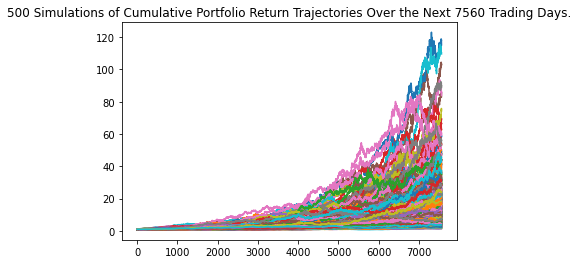

In [32]:
# Visualize the 30-year Monte Carlo simulation by creating an overlay line plot
MC_spy_agg.plot_simulation()


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

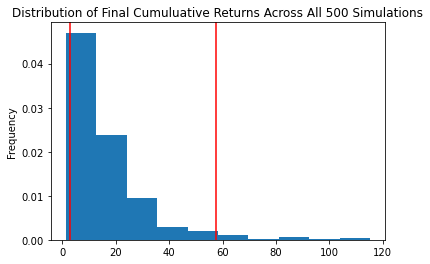

In [33]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation by plotting a histogram
MC_spy_agg.plot_distribution()


#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [34]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
spy_agg_table = MC_spy_agg.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
spy_agg_table

count           500.000000
mean             16.625142
std              15.294558
min               1.278823
25%               7.076589
50%              12.018074
75%              21.197840
max             115.274882
95% CI Lower      2.729389
95% CI Upper     57.406363
Name: 7560, dtype: float64

### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [35]:
# Print the current balance of the stock and bond portion of the members portfolio

total_stocks_bonds


69133.9

In [45]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = round(spy_agg_table[8]*total_stocks_bonds,2)
ci_upper_thirty_cumulative_return = round(spy_agg_table[9]*total_stocks_bonds,2)

# Print the result of calculations
print(f'The lower bounds for the expected value of the portfolio with a 95% confidence interval is ${ci_lower_thirty_cumulative_return}')
print(f'The upper bounds for the expected value of the portfolio with a 95% confidence interval is ${ci_upper_thirty_cumulative_return}')

The lower bounds for the expected value of the portfolio with a 95% confidence interval is $188693.33
The upper bounds for the expected value of the portfolio with a 95% confidence interval is $3968725.79


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [37]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 80% to SPY and 20% to AGG .
# Run 500 samples.
MC_10years = MCSimulation(
    portfolio_data = prices_3years_df,
    weights = [.8,.2],
    num_simulation = 500,
    num_trading_days = 252*10
)
    
# Review the simulation input data
MC_10years.portfolio_data.head()


SPY                                      \
                             open     high      low   close    volume   
timestamp                                                               
2019-04-12 04:00:00+00:00  290.01  290.470  288.261  290.16  69835782   
2019-04-15 04:00:00+00:00  290.27  290.350  289.075  289.97  50222730   
2019-04-16 04:00:00+00:00  290.96  291.010  289.500  290.16  52154597   
2019-04-17 04:00:00+00:00  291.41  291.425  288.990  289.45  58268470   
2019-04-18 04:00:00+00:00  290.12  290.320  288.660  290.02  69414428   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-04-12 04:00:00+00:00      232166  289.776012          NaN  108.26   
2019-04-15 04:00:00+00:00      199622  289.773677    -0.000655  108.21   
2019-04-16 04:00:00+00:00      206469  290.277078     0.000655  108.12   
2019-04-17 04:00:00+00:00      245037  289.770682    -0.002447  108.09   
2019-04-18 04:00:00+00:00      231296  289.794161     0.001969  108.23   

                                                                          \
                               high     low   close   volume trade_count   
timestamp                                                                  
2019-04-12 04:00:00+00:00  108.3500  108.22  108.27  2430609       11376   
2019-04-15 04:00:00+00:00  108.3000  108.21  108.25  2546204       10053   
2019-04-16 04:00:00+00:00  108.2100  108.02  108.06  4093950       12649   
2019-04-17 04:00:00+00:00  108.1899  108.05  108.05  3390171        9569   
2019-04-18 04:00:00+00:00  108.2900  108.16  108.19  2217221        8388   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-04-12 04:00:00+00:00  108.269606          NaN  
2019-04-15 04:00:00+00:00  108.253507    -0.000185  
2019-04-16 04:00:00+00:00  108.108731    -0.001755  
2019-04-17 04:00:00+00:00  108.090758    -0.000093  
2019-04-18 04:00:00+00:00  108.211849     0.001296

In [38]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_10years.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/yjun_ln/Desktop/financial_planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.989589,1.013841,0.995666,1.000428,1.007776,0.991673,0.983753,0.979888,1.007392,0.996113,...,0.974458,0.994238,0.985207,0.996188,1.018477,1.025424,0.985900,0.991188,0.993248,0.995624
2,0.992768,1.018236,0.989154,0.993811,1.000700,0.999812,0.971651,0.986177,1.014201,1.007337,...,0.983917,0.991094,0.994607,0.996881,1.037931,1.028544,0.981236,0.995167,0.988870,0.977836
3,0.967644,1.033185,0.988567,0.975190,0.982668,1.005373,0.977891,0.978415,0.999950,1.005143,...,0.994710,0.993508,0.974547,0.986840,1.031882,1.033955,0.958979,0.989338,0.992379,0.983118
4,0.969814,1.051724,0.982900,0.975216,0.986480,1.006988,0.987492,0.992992,0.996695,1.005828,...,0.988917,0.986454,0.989471,0.985035,1.059288,1.022415,0.957148,0.991553,0.998558,0.967550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,4.772844,2.175503,5.928806,1.376527,2.471885,4.451011,5.732324,3.396371,3.617196,2.865338,...,3.305638,2.358752,3.484106,2.237294,6.673581,1.073534,3.523900,3.303309,5.769428,5.901455
2517,4.820884,2.152192,5.852423,1.380960,2.471390,4.472555,5.773845,3.326348,3.614656,2.878451,...,3.333335,2.385919,3.521820,2.265547,6.711480,1.070768,3.486011,3.336750,5.830053,5.955995
2518,4.862213,2.135003,5.848541,1.354619,2.449980,4.518016,5.796344,3.298042,3.584659,2.857188,...,3.353061,2.386656,3.613148,2.225879,6.591293,1.068438,3.471430,3.398147,5.676692,5.935361
2519,4.904247,2.163101,5.831384,1.360100,2.459830,4.517027,5.816555,3.385467,3.589260,2.820896,...,3.324747,2.370027,3.663931,2.254794,6.657969,1.064666,3.511939,3.410665,5.565690,5.900571


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

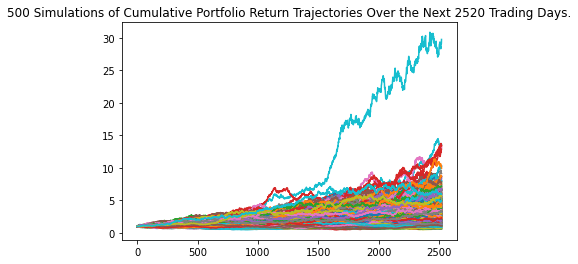

In [39]:
# Visualize the 10-year Monte Carlo simulation by creating an overlay line plot
MC_10years.plot_simulation()


<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

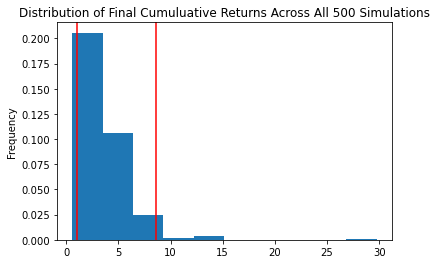

In [40]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation by plotting a histogram
MC_10years.plot_distribution()


In [41]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
MC_10years_table = MC_10years.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
MC_10years_table

count           500.000000
mean              3.567730
std               2.350477
min               0.574768
25%               2.066406
50%               3.068078
75%               4.446559
max              29.745756
95% CI Lower      1.023415
95% CI Upper      8.579812
Name: 2520, dtype: float64

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [42]:
# Print the current balance of the stock and bond portion of the members portfolio
total_stocks_bonds


69133.9

In [46]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = round(MC_10years_table[8]*total_stocks_bonds,2)
ci_upper_ten_cumulative_return = round(MC_10years_table[9]*total_stocks_bonds,2)

# Print the result of calculations
print(f'The new lower bounds for the expected value of the portfolio with a 95% confidence interval is ${ci_lower_ten_cumulative_return}')
print(f'The new upper bounds for the expected value of the portfolio with a 95% confidence interval is ${ci_upper_ten_cumulative_return}')


The new lower bounds for the expected value of the portfolio with a 95% confidence interval is $70752.7
The new upper bounds for the expected value of the portfolio with a 95% confidence interval is $593155.84


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?

In [ ]:
Base on running 2 separate Monte Carlo simulation on 30 years and 10 years we can 
see that ther is a 95% chance that the current investment amount of $69133.9 in 
the portfolio with a 80% weight in stocks and 20% in bonds over the next 10 years 
will end with in the range of $75353.98 and $581853.3. These amount are way less 
than investing 60% in stocks and 20% in bonds over the next 30 years, which will 
end with in the range of $198942.83 and $3816039.86. So heavy weighting on stocks 
will not allow the members to retire after only 10 years.